In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib
from datetime import date, datetime
%matplotlib inline
palette = sns.color_palette("Spectral", n_colors=5) 
sns.set_theme(context='notebook', palette=palette, style='darkgrid')

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


In [3]:
df = pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv", sep="\t")
df.head(5).style.background_gradient(cmap='Greys')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000000,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000000,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000000,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000000,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
print("Shape of the DataFrame:",df.shape);
print("=======================================");
print("Columns in DataFrame:\n",df.columns);

Shape of the DataFrame: (2240, 29)
Columns in DataFrame:
 Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [5]:
print("Summary of a Dataframe:",df.info());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [7]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])
missing_data(df).style.background_gradient(cmap='Greys')


,Total,Percentage
Income,24,1.071429
ID,0,0.000000
NumDealsPurchases,0,0.000000
Z_Revenue,0,0.000000
Z_CostContact,0,0.000000
Complain,0,0.000000
AcceptedCmp2,0,0.000000
AcceptedCmp1,0,0.000000
AcceptedCmp5,0,0.000000
AcceptedCmp4,0,0.000000


In [8]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [9]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

# Data Featuring

In [10]:
df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)
df.head(5).style.background_gradient(cmap='Greys')

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.000000,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.000000,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.000000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.000000,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.000000,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [11]:
# df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, format="%d-%m-%Y")
# latest_date = df['Dt_Customer'].max()
# df['Days_is_client'] = (latest_date - df['Dt_Customer']).dt.days
# df.drop(['Dt_Customer'], axis=1, inplace=True)

df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, format="%d-%m-%Y")
fixed_date = datetime.strptime("01-01-2021", "%d-%m-%Y")
df['Days_is_client'] = (fixed_date - df['Dt_Customer']).dt.days
df.drop(['Dt_Customer'], axis=1, inplace=True)

df.head(5).style.background_gradient(cmap='Greys')

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_is_client
0,1957,Graduation,Single,58138.000000,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,3041
1,1954,Graduation,Single,46344.000000,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2491
2,1965,Graduation,Together,71613.000000,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2690
3,1984,Graduation,Together,26646.000000,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2517
4,1981,PhD,Married,58293.000000,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2539


In [12]:
df[df['Days_is_client'] == 0]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_is_client


In [13]:
fixed_year = 2021
df['Age'] = fixed_year - df['Year_Birth']
df.drop(['Year_Birth'], axis=1, inplace=True)
df.head(5).style.background_gradient(cmap='Greys')

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_is_client,Age
0,Graduation,Single,58138.000000,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,3041,64
1,Graduation,Single,46344.000000,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2491,67
2,Graduation,Together,71613.000000,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2690,56
3,Graduation,Together,26646.000000,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2517,37
4,PhD,Married,58293.000000,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2539,40


In [14]:
categorical_columns = df.select_dtypes('object')

for column in categorical_columns:
    value_counts = df[column].value_counts()
    print(value_counts)
    print("\n")

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64




In [15]:
# Standardize 'Marital_Status' into 2 broader groups
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')

# Standardize 'Education' into 3 broader groups
df['Education'] = df['Education'].replace(['PhD', 'Master'], 'Postgraduate')  
df['Education'] = df['Education'].replace(['2n Cycle', 'Graduation'], 'Graduate')
df['Education'] = df['Education'].replace(['Basic'], 'Undergraduate')

for column in categorical_columns:
    print(f"Unique values in {column}:")
    print(df[column].unique())
    print("\n")

Unique values in Education:
['Graduate' 'Postgraduate' 'Undergraduate']


Unique values in Marital_Status:
['Single' 'Relationship']




In [16]:
# Combining columns together to reduce the number of dimensions

df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [17]:
columns_del = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Kidhome', 'Teenhome']
df.drop(columns_del, axis=1, inplace=True)

In [18]:
df.head(5).style.background_gradient(cmap='Greys')

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Days_is_client,Age,Kids,Expenses,TotalAcceptedCmp,TotalNumPurchases
0,Graduate,Single,58138.000000,58,635,88,546,172,88,88,3,8,10,4,7,0,3041,64,0,1617,1,25
1,Graduate,Single,46344.000000,38,11,1,6,2,1,6,2,1,1,2,5,0,2491,67,2,27,0,6
2,Graduate,Relationship,71613.000000,26,426,49,127,111,21,42,1,8,2,10,4,0,2690,56,0,776,0,21
3,Graduate,Relationship,26646.000000,26,11,4,20,10,3,5,2,2,0,4,6,0,2517,37,1,53,0,8
4,Postgraduate,Relationship,58293.000000,94,173,43,118,46,27,15,5,5,3,6,5,0,2539,40,1,422,0,19


In [19]:
df.shape

(2240, 22)

In [20]:
df.drop_duplicates(inplace=True)
# Remove rows with any missing values (NaN)
df.dropna(inplace=True)

df.shape

(2031, 22)

In [21]:
# binary_columns = [col for col in df.columns if df[col].nunique() == 2]
# categorical_columns = [col for col in df.columns if 2 < df[col].nunique() < 10]
# numerical_columns = [col for col in df.select_dtypes(include=['number']).columns 
#                      if col not in binary_columns + categorical_columns]

categorical_columns = [col for col in df.columns if df[col].nunique() < 10]
numerical_columns = [col for col in df.select_dtypes(include=['number']).columns 
                     if col not in categorical_columns]

In [22]:
z_scores = pd.DataFrame(stats.zscore(df[numerical_columns]), columns=numerical_columns, index=df.index)

# Generate descriptive statistics for the z-scores
print("Descriptive Statistics for Z-Scores before Outliers Removal")
display(z_scores.describe().round(3))

Descriptive Statistics for Z-Scores before Outliers Removal


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Days_is_client,Age,Expenses,TotalNumPurchases
count,2031.000,2031.000,2031.000,2031.000,2031.000,2031.000,2031.000,2031.000,2031.000,2031.000,2031.000,2031.000,2031.000,2031.000,2031.000,2031.000,2031.000
mean,0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.984,-1.688,-0.905,-0.662,-0.740,-0.684,-0.655,-0.847,-1.208,-1.487,-0.910,-1.786,-2.182,-1.743,-2.273,-0.999,-1.945
25%,-0.660,-0.859,-0.837,-0.611,-0.670,-0.629,-0.631,-0.673,-0.691,-0.762,-0.910,-0.860,-0.952,-0.863,-0.686,-0.893,-0.900
50%,-0.032,0.004,-0.384,-0.461,-0.441,-0.465,-0.462,-0.383,-0.174,-0.036,-0.229,-0.242,0.278,-0.003,-0.101,-0.350,0.014
75%,0.634,0.867,0.594,0.168,0.273,0.228,0.165,0.235,0.344,0.689,0.451,0.684,0.688,0.867,0.818,0.729,0.797
max,24.058,1.730,3.520,4.340,6.864,4.042,5.658,5.355,6.550,8.307,8.619,2.228,6.018,1.713,6.330,3.176,3.801


**Z-scores above 3 are considered outliers, which could skew our clustering results and should be removed. This is particularly crucial in the `Income` column, where the highest Z-score exceeds 24.**

In [23]:
outliers = z_scores[(np.abs(z_scores) > 5).any(axis=1)]

# Drop the rows containing outliers
df = df.drop(outliers.index)

In [24]:
df.shape

(2011, 22)

# Univariate Analysis

## Numerical

In [25]:
numerical_columns

['Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Days_is_client',
 'Age',
 'Expenses',
 'TotalNumPurchases']

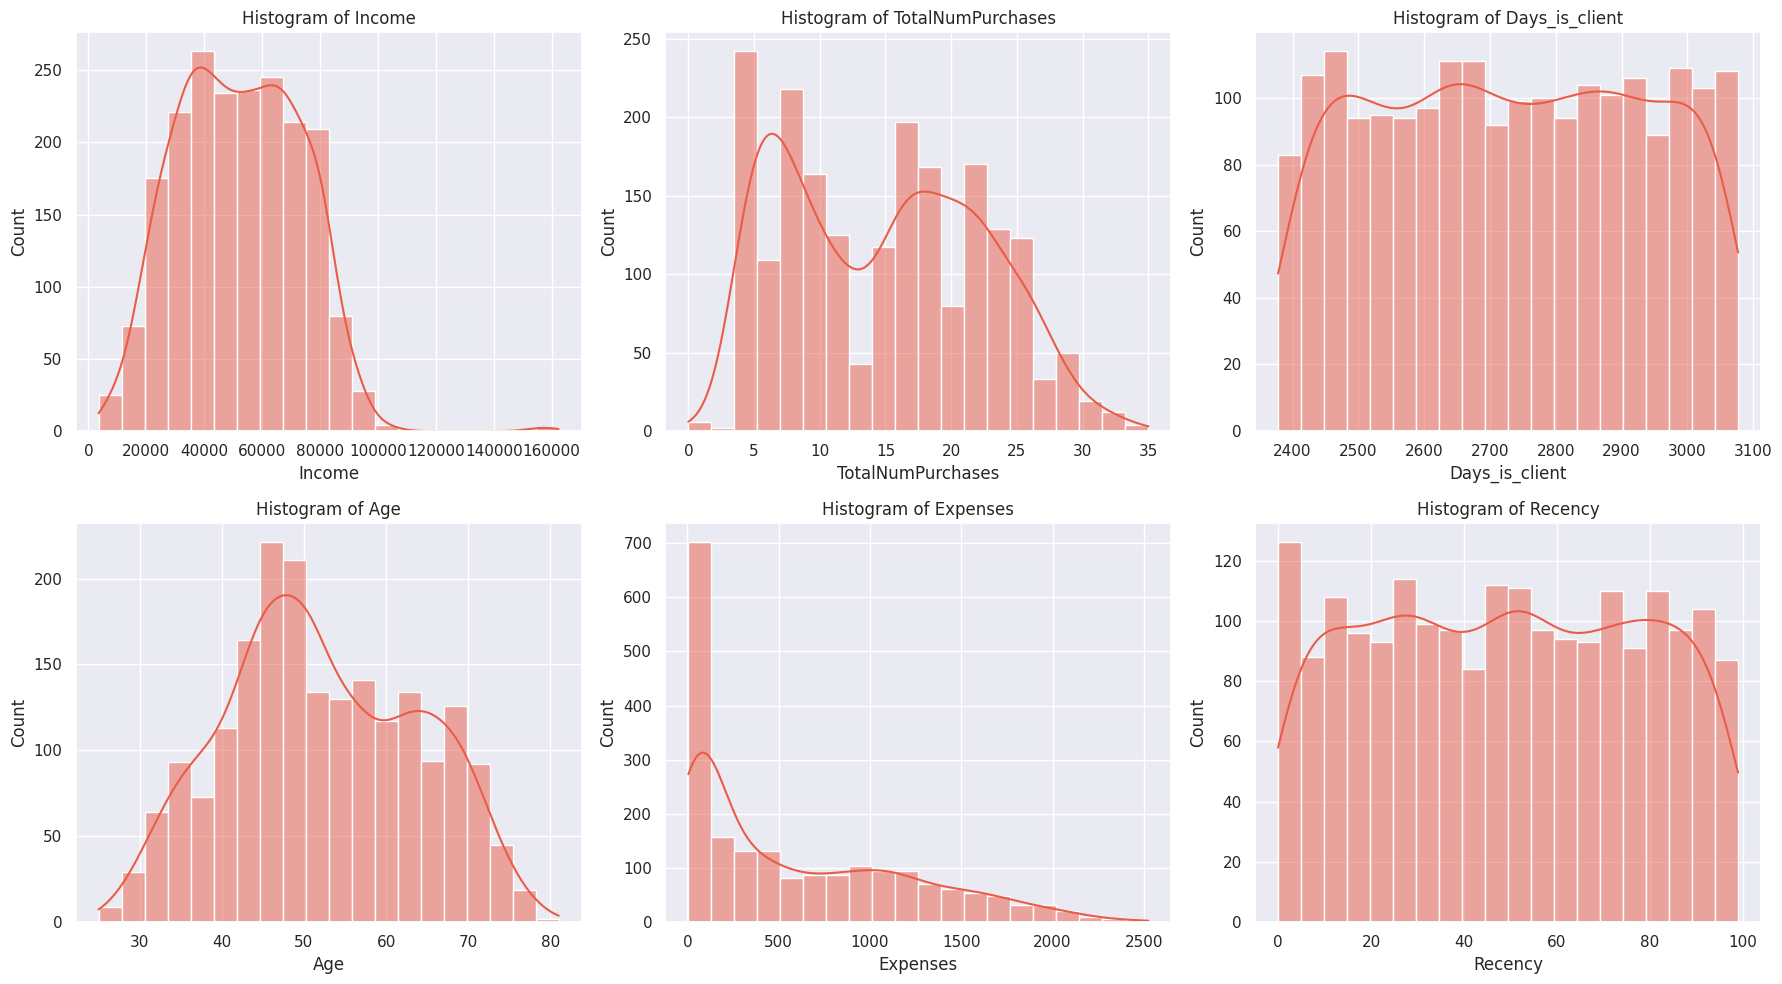

In [26]:
# Plot histograms for each numerical column
# for column in ['Income', 'Recency', 'Days_is_client', 'Age', 'Expenses', 'TotalNumPurchases']:
   
#     plt.figure(figsize=(8, 5))
#     sns.histplot(data=df, x=column, kde=True, bins=20)
#     plt.title(f'Histogram of {column}')
    
#     plt.tight_layout()
#     plt.show()

columns = ['Income', 'TotalNumPurchases', 'Days_is_client', 'Age', 'Expenses', 'Recency']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, column in enumerate(columns):
    sns.histplot(data=df, x=column, kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

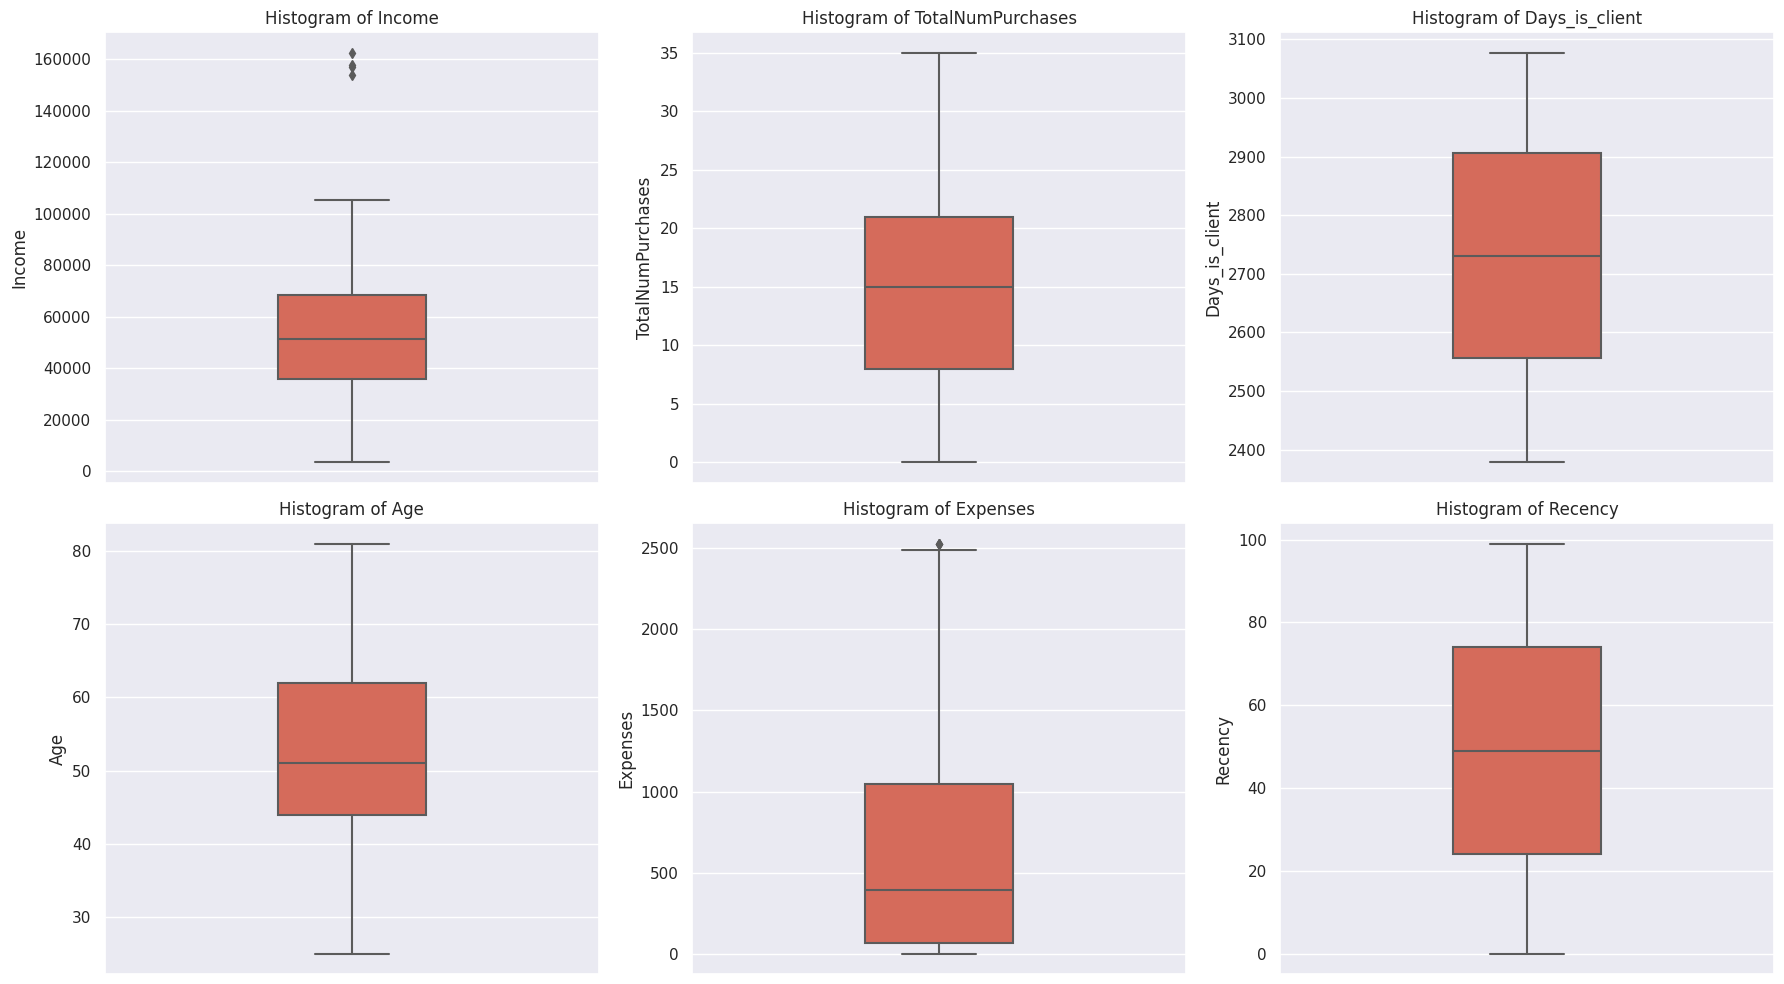

In [27]:
columns = ['Income', 'TotalNumPurchases', 'Days_is_client', 'Age', 'Expenses', 'Recency']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, column in enumerate(columns):
    sns.boxplot(data=df, y=column, ax=axes[i], width=0.3)
    axes[i].set_title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

## Categorical

In [28]:
categorical_columns

['Education', 'Marital_Status', 'Complain', 'Kids', 'TotalAcceptedCmp']

### Education, Marital Status, Kid

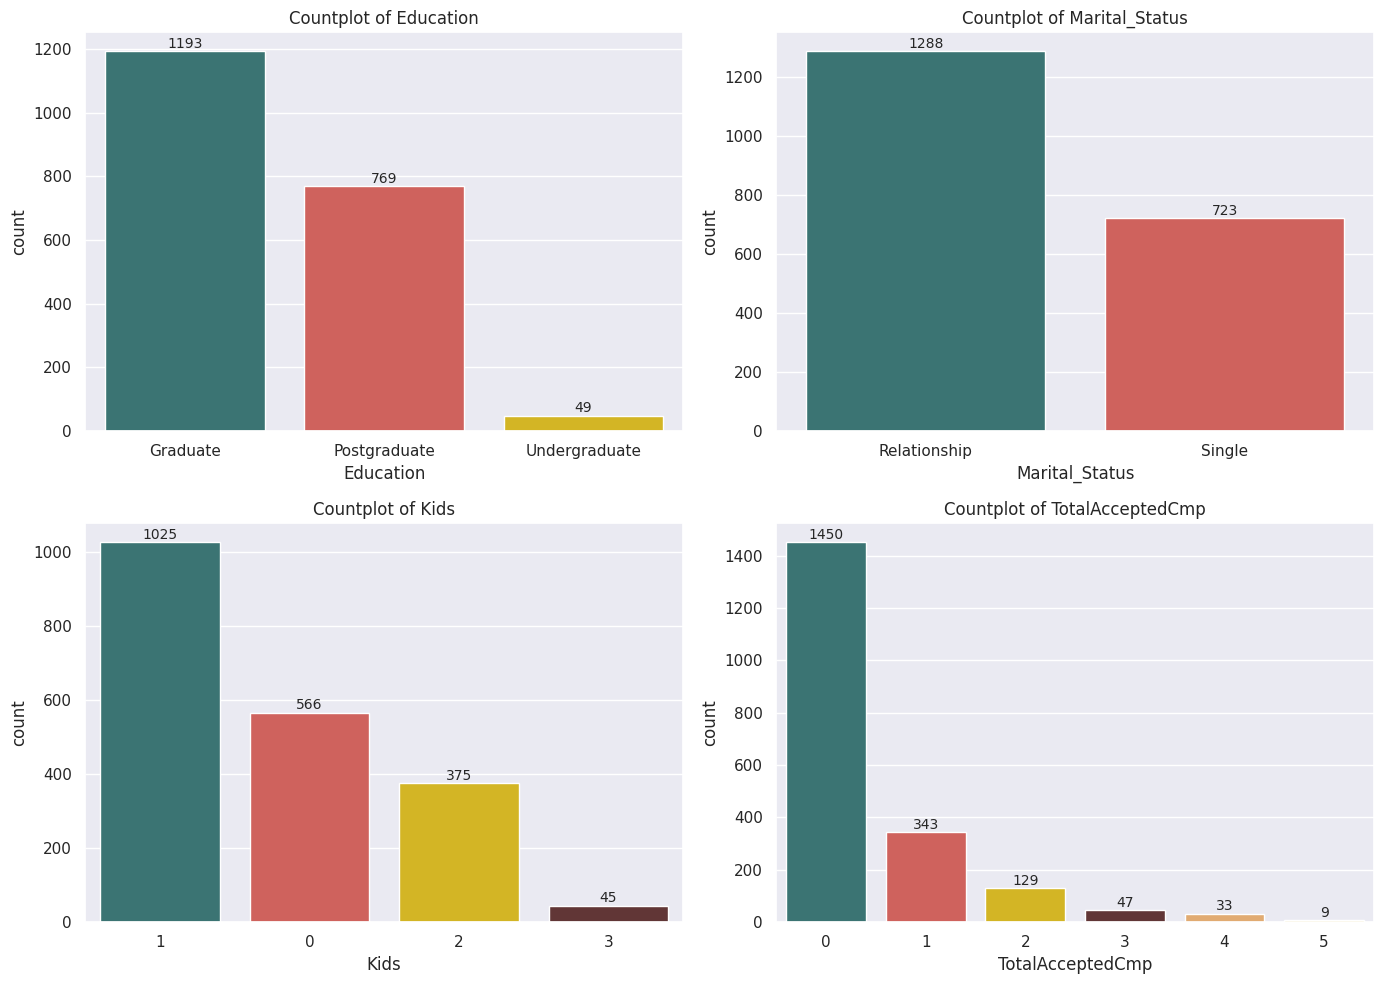

In [29]:
# # Define the color palette
# custom_palette = ["#327D7C", "#E2504A", "#F0C808"]

# # Plot countplots for each categorical column
# for column in ['Education', 'Marital_Status', 'Kids', 'TotalAcceptedCmp']:
    
#     plt.figure(figsize=(8, 5))
#     sns.countplot(data=df, x=column, palette=custom_palette)
#     plt.title(f'Countplot of {column}')
    
#     plt.tight_layout()
#     plt.show()

custom_palette = ["#327D7C", "#E2504A", "#F0C808", "#682F2F", "#F3AB60", "#F0C808"]
categorical_columns_show = ['Education', 'Marital_Status', 'Kids', 'TotalAcceptedCmp']

# Tạo figure với 2 hàng 2 cột cho countplot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, column in enumerate(categorical_columns_show):
    unique_vals = df[column].value_counts().index
    color_map = dict(zip(unique_vals, custom_palette[:len(unique_vals)]))

    # Vẽ countplot
    ax = axes[i]
    plot = sns.countplot(data=df, x=column, order=unique_vals,
                         palette=[color_map[val] for val in unique_vals], ax=ax)
    ax.set_title(f'Countplot of {column}')

    # Thêm nhãn số lượng trên cột
    for p in plot.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height:.0f}',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

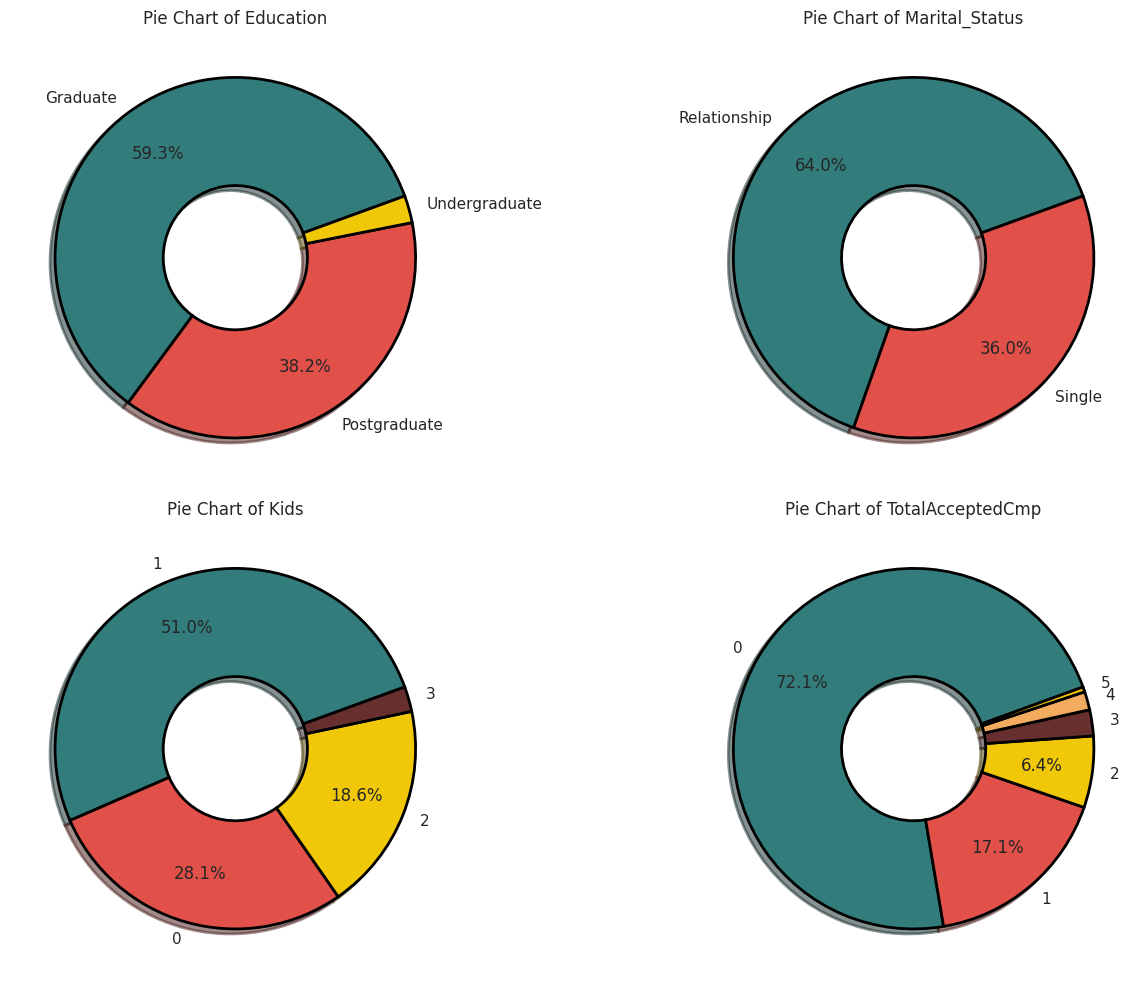

In [30]:
def autopct_format(pct):
    return f'{pct:.1f}%' if pct >= 3 else ''

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, column in enumerate(categorical_columns_show):
    counts = df[column].value_counts()
    labels = counts.index
    color_map = dict(zip(labels, custom_palette[:len(labels)]))  # Same mapping as countplot
    colors = [color_map[label] for label in labels]

    axes[i].pie(counts, labels=labels, colors=colors, autopct=autopct_format, shadow=True,
                wedgeprops=dict(width=0.6, edgecolor="black", linewidth=2),
                startangle=20, pctdistance=0.72)
    axes[i].set_title(f'Pie Chart of {column}')

plt.tight_layout()
plt.show()

# Bivariate Analysis

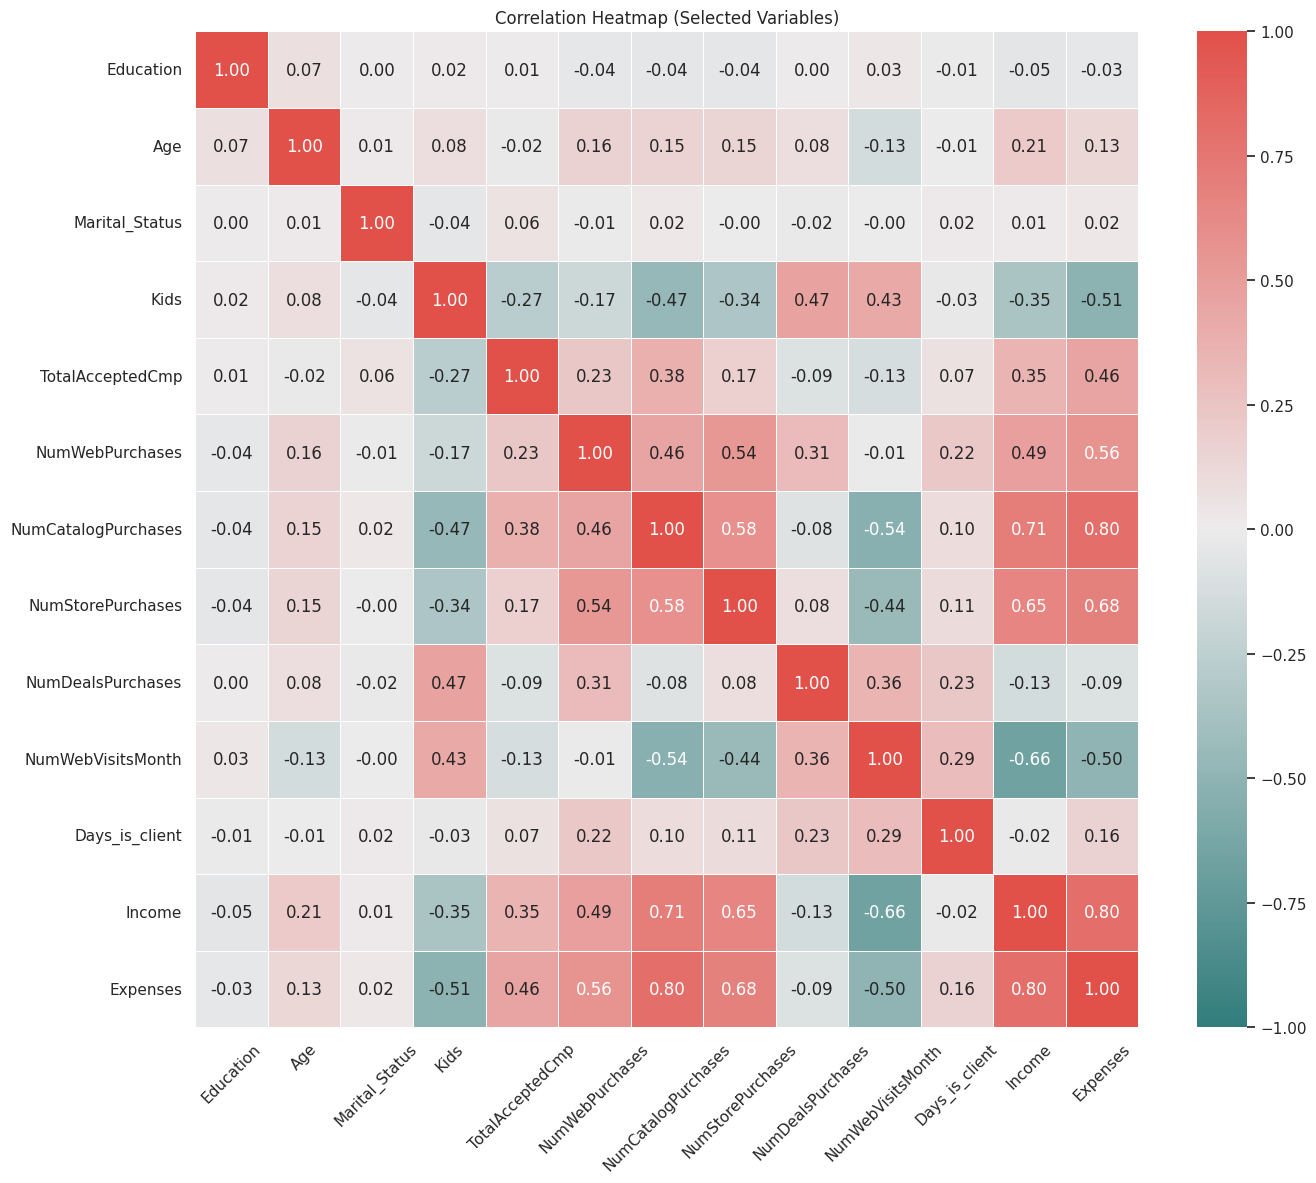

In [31]:
selected_cols = ['Education', 'Age', 'Marital_Status', 'Kids', 'TotalAcceptedCmp',
                 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                 'NumDealsPurchases', 'NumWebVisitsMonth', 'Days_is_client',
                 'Income', 'Expenses']

# Sao chép và encode các biến phân loại nếu cần
corr_data = df[selected_cols].copy()

# Nếu Education và Marital_Status chưa được mã hóa → dùng get_dummies hoặc Label Encoding
for col in ['Education', 'Marital_Status']:
    if corr_data[col].dtype == 'object' or str(corr_data[col].dtype).startswith('category'):
        corr_data[col] = corr_data[col].astype('category').cat.codes

# Tính ma trận tương quan
corr_df = corr_data.corr()

# Custom color map
colors = ["#327D7C", "#EDEBEC", "#E2504A"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Vẽ heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_df, cmap=cmap, center=0, vmin=-1, vmax=1, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Selected Variables)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Age, Education, Marial, Kid - Income

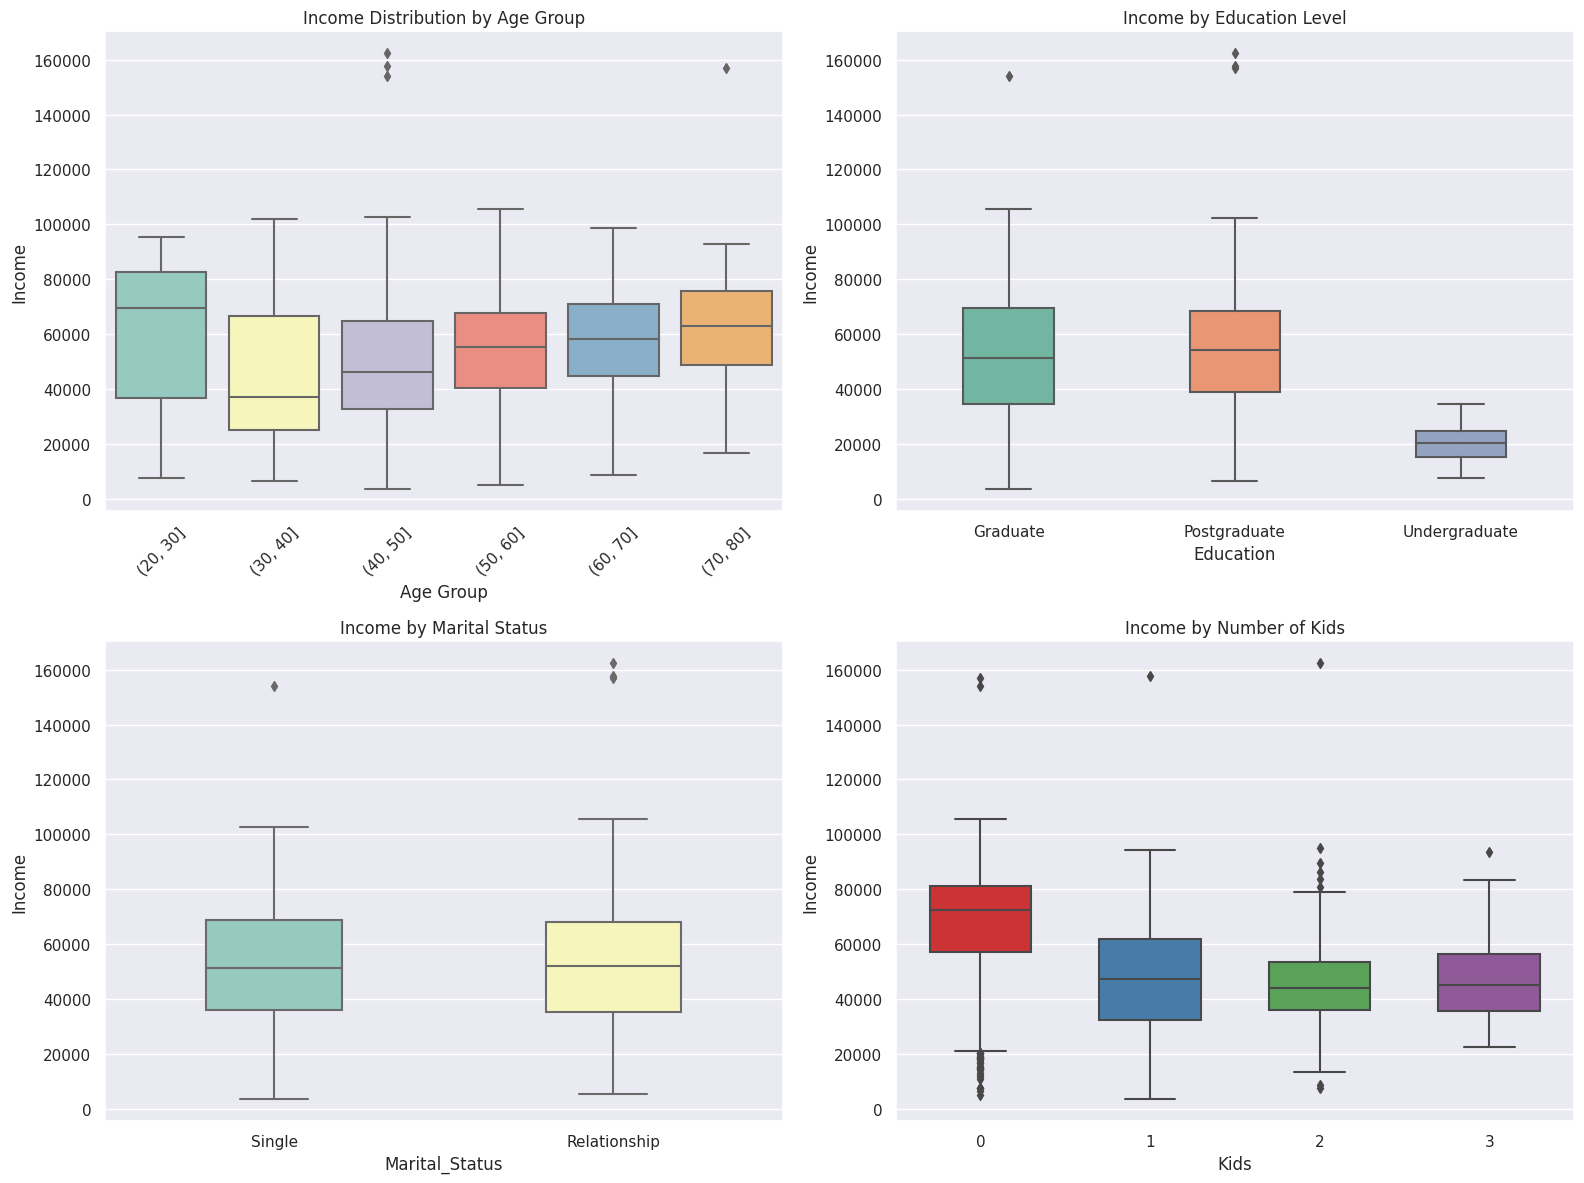

In [32]:
age_bins = range(20, 90, 10)
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins)

# Tính trung bình thu nhập theo nhóm tuổi
income_by_agegroup = df.groupby('AgeGroup')['Income'].mean().reset_index()

# Vẽ biểu đồ
# Biểu đồ 1: Age vs Income (scatter + regression)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()
sns.boxplot(data=df, x='AgeGroup', y='Income', palette='Set3', ax=axes[0])
axes[0].set_title('Income Distribution by Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Income')
axes[0].tick_params(axis='x', rotation=45)

# sns.regplot(data=df, x='Age', y='Income', ax=axes[0], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
# axes[0].set_title('Age vs Income')


# Biểu đồ 2: Education vs Income (boxplot)
sns.boxplot(data=df, x='Education', y='Income', ax=axes[1], palette='Set2', width=0.4)
axes[1].set_title('Income by Education Level')

# Biểu đồ 3: Marital_Status vs Income (boxplot)
sns.boxplot(data=df, x='Marital_Status', y='Income', ax=axes[2], palette='Set3', width=0.4)
axes[2].set_title('Income by Marital Status')

# Biểu đồ 4: Kids vs Income (barplot - mean income)
sns.boxplot(data=df, x='Kids', y='Income', ax=axes[3], palette='Set1', width=0.6)
axes[3].set_title('Income by Number of Kids')

plt.tight_layout()
plt.show()

## Income - NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumDealsPurchases, NumWebVisitsMonth

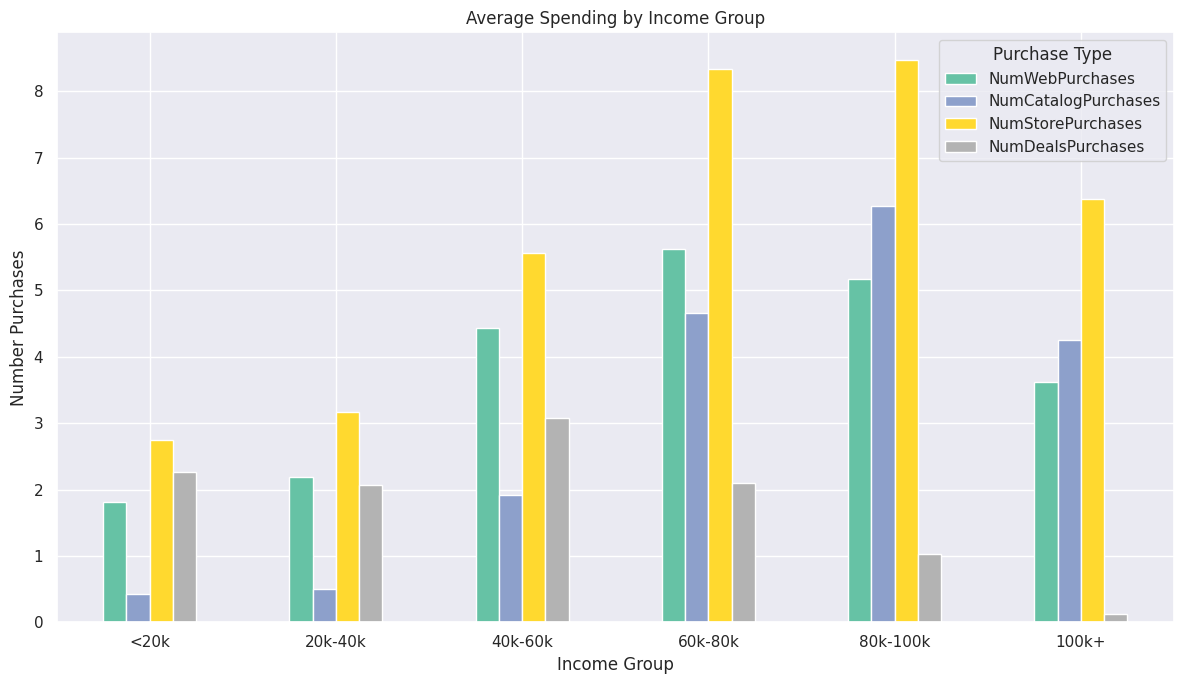

In [33]:
# Định nghĩa khoảng thu nhập
bins = [0, 20000, 40000, 60000, 80000, 100000, float('inf')]
labels = ['<20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k+']

# Tạo cột phân nhóm theo thu nhập
df['Income_Group'] = pd.cut(df['Income'], bins=bins, labels=labels)

# Các cột kiểu mua
num_purchase_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']

# Tính tổng chi tiêu trung bình theo nhóm thu nhập
income_group_means = df.groupby('Income_Group')[num_purchase_columns].mean()

# Vẽ biểu đồ
income_group_means.plot(kind='bar', figsize=(12, 7), colormap='Set2')
plt.title('Average Spending by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Number Purchases')
plt.xticks(rotation=0)
plt.legend(title='Purchase Type')
plt.tight_layout()
plt.show()

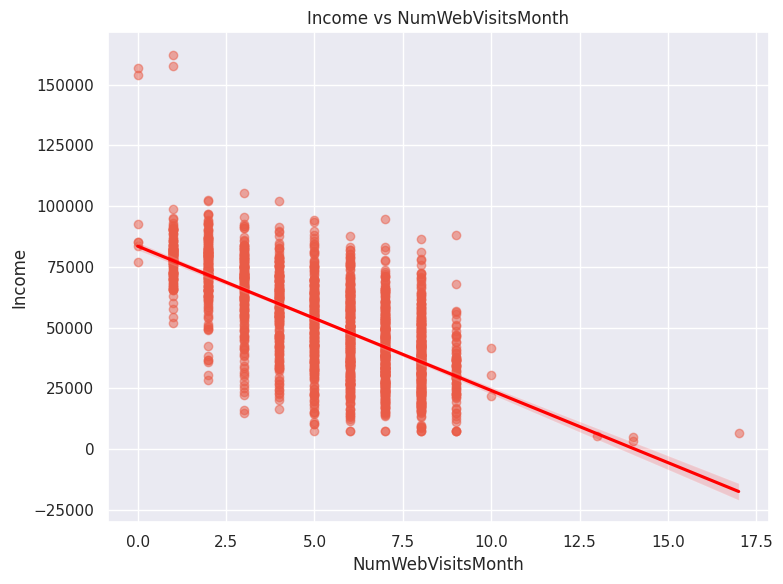

In [34]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='NumWebVisitsMonth', y='Income', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Income vs NumWebVisitsMonth')
plt.xlabel('NumWebVisitsMonth')
plt.ylabel('Income')
plt.tight_layout()
plt.show()

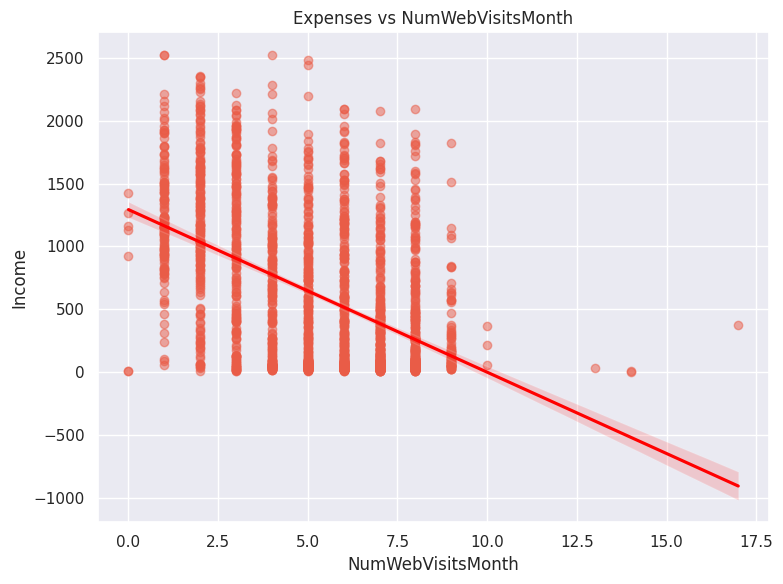

In [35]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='NumWebVisitsMonth', y='Expenses', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Expenses vs NumWebVisitsMonth')
plt.xlabel('NumWebVisitsMonth')
plt.ylabel('Income')
plt.tight_layout()
plt.show()

## Age, Education, Marial, Kid, Days_is_client, Income - Expenses

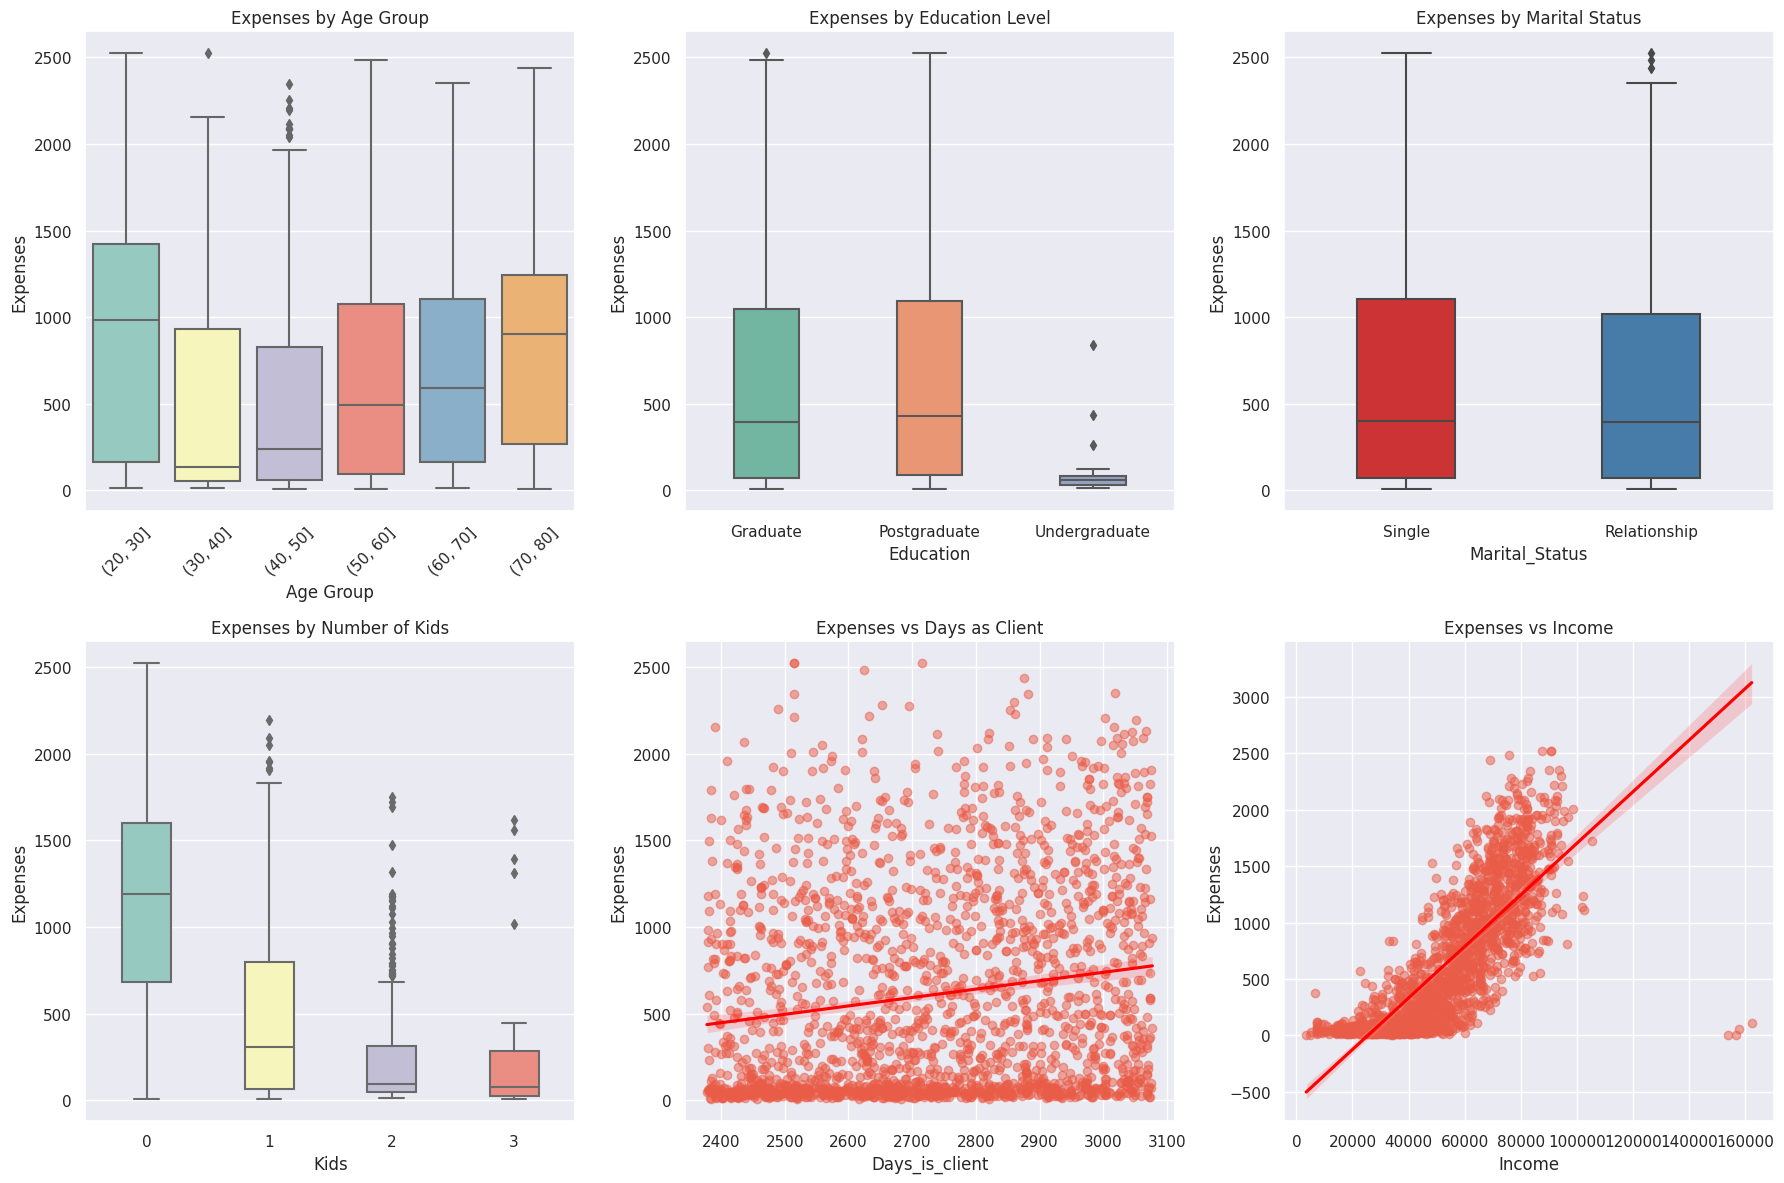

In [36]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# 3. Biểu đồ 1: AgeGroup vs Expenses (boxplot)
sns.boxplot(data=df, x='AgeGroup', y='Expenses', palette='Set3', ax=axes[0])
axes[0].set_title('Expenses by Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Expenses')
axes[0].tick_params(axis='x', rotation=45)

# 4. Biểu đồ 2: Education vs Expenses (boxplot)
sns.boxplot(data=df, x='Education', y='Expenses', palette='Set2', ax=axes[1], width=0.4)
axes[1].set_title('Expenses by Education Level')

# 5. Biểu đồ 3: Marital_Status vs Expenses (boxplot)
sns.boxplot(data=df, x='Marital_Status', y='Expenses', palette='Set1', ax=axes[2], width=0.4)
axes[2].set_title('Expenses by Marital Status')

# 6. Biểu đồ 4: Kids vs Expenses (boxplot)
sns.boxplot(data=df, x='Kids', y='Expenses', palette='Set3', ax=axes[3], width=0.4)
axes[3].set_title('Expenses by Number of Kids')

# 7. Biểu đồ 5: Days_is_client vs Expenses (regplot)
sns.regplot(data=df, x='Days_is_client', y='Expenses', ax=axes[4],
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
axes[4].set_title('Expenses vs Days as Client')

# 8. Biểu đồ 6: Income vs Expenses (regplot)
sns.regplot(data=df, x='Income', y='Expenses', ax=axes[5],
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
axes[5].set_title('Expenses vs Income')

plt.tight_layout()
plt.show()

### Từng loại chi tiêu

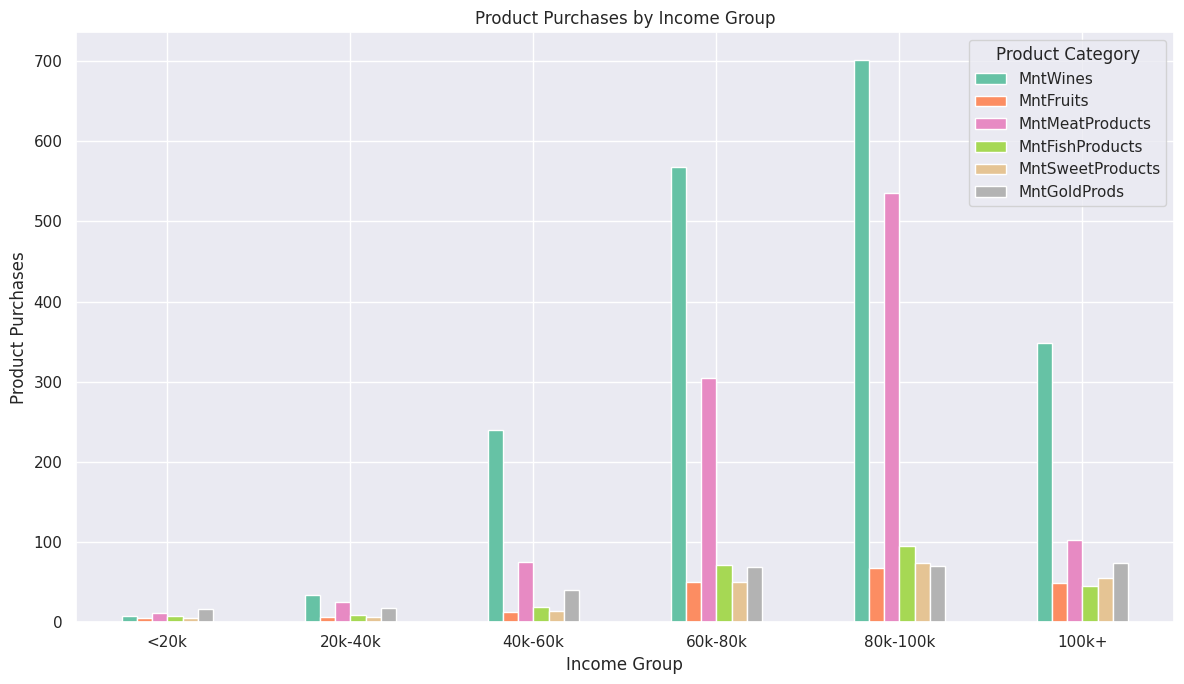

In [37]:
# Các cột chi tiêu
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts',
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Tính tổng chi tiêu trung bình theo nhóm thu nhập
income_group_means = df.groupby('Income_Group')[spending_columns].mean()

# Vẽ biểu đồ
income_group_means.plot(kind='bar', figsize=(12, 7), colormap='Set2')
plt.title('Product Purchases by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Product Purchases')
plt.xticks(rotation=0)
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

In [38]:
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Days_is_client,Age,Kids,Expenses,TotalAcceptedCmp,TotalNumPurchases,AgeGroup,Income_Group
0,Graduate,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,3041,64,0,1617,1,25,"(60, 70]",40k-60k
1,Graduate,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,2491,67,2,27,0,6,"(60, 70]",40k-60k
2,Graduate,Relationship,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,2690,56,0,776,0,21,"(50, 60]",60k-80k
3,Graduate,Relationship,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,2517,37,1,53,0,8,"(30, 40]",20k-40k
4,Postgraduate,Relationship,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,2539,40,1,422,0,19,"(30, 40]",40k-60k


# Data Preprocessing

In [39]:
df.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'AgeGroup', 'Income_Group'], axis=1, inplace=True)

In [40]:
# Define categorical columns to be one-hot encoded
categorical_columns = df.select_dtypes(include=['object']).columns 

# Apply one-hot encoding directly with pandas
X_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype=int)

In [41]:
# Instantiate Scaler
scaler = StandardScaler()

# fit_transform
X_scaled = scaler.fit_transform(X_encoded)
X_scaled.shape

(2011, 11)

# Clustering

## Elbow Curve

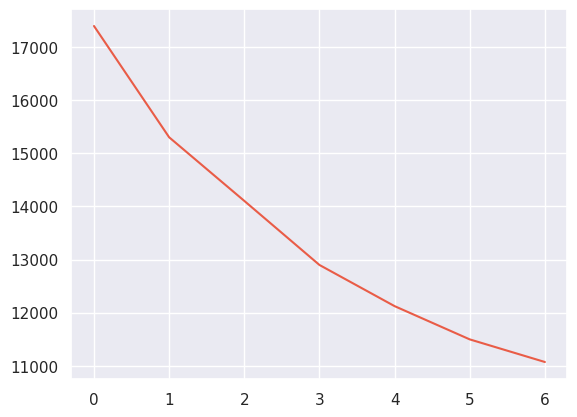

In [42]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=101)
    kmeans.fit(X_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)
plt.show()

## Silhouette Analysis

In [43]:
# Silhouette analysis

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=101)
    kmeans.fit(X_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.20297718112219346
For n_clusters=3, the silhouette score is 0.2211585219507285
For n_clusters=4, the silhouette score is 0.15735061384552096
For n_clusters=5, the silhouette score is 0.15774902152496517
For n_clusters=6, the silhouette score is 0.1583236771155387
For n_clusters=7, the silhouette score is 0.15577281576436225
For n_clusters=8, the silhouette score is 0.1470776436381887
For n_clusters=9, the silhouette score is 0.14240413910567518
For n_clusters=10, the silhouette score is 0.14467166173991303


## KMeans

In [44]:
# Initialize the KMeans algorithm with chosen k
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=101)

# Fit the KMeans algorithm
kmeans.fit(X_scaled)

# Predict the cluster labels 
y_kmeans = kmeans.fit_predict(X_scaled)

# Transform the scaled data back to its original scale using the inverse transformation
X_transformed = scaler.inverse_transform(X_scaled)

In [45]:
pd.DataFrame(X_transformed, columns=X_encoded.columns).head()

,Income,Recency,Days_is_client,Age,Kids,Expenses,TotalAcceptedCmp,TotalNumPurchases,Education_Postgraduate,Education_Undergraduate,Marital_Status_Single
0,58138.0,58.0,3041.0,64.0,0.0,1617.0,1.000000e+00,25.0,0.0,-3.469447e-18,1.0
1,46344.0,38.0,2491.0,67.0,2.0,27.0,-5.551115e-17,6.0,0.0,-3.469447e-18,1.0
2,71613.0,26.0,2690.0,56.0,0.0,776.0,-5.551115e-17,21.0,0.0,-3.469447e-18,0.0
3,26646.0,26.0,2517.0,37.0,1.0,53.0,-5.551115e-17,8.0,0.0,-3.469447e-18,0.0
4,58293.0,94.0,2539.0,40.0,1.0,422.0,-5.551115e-17,19.0,1.0,-3.469447e-18,0.0


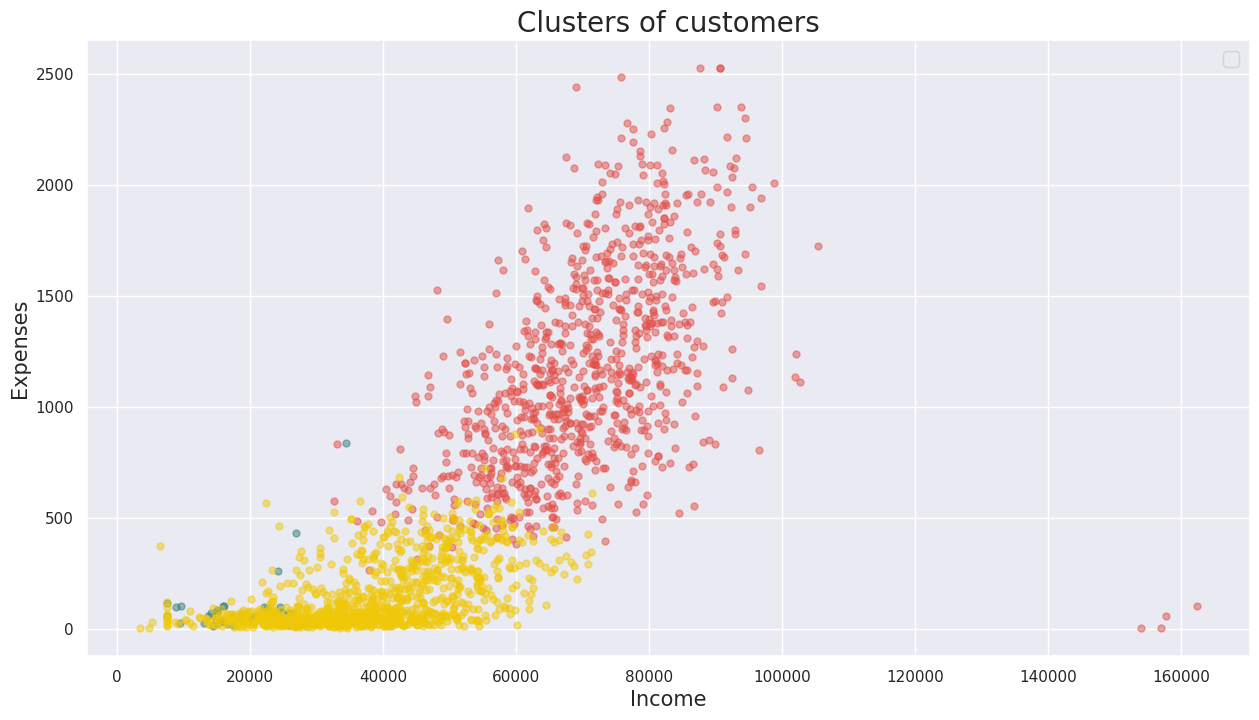

In [46]:
# Visualising the clusters
plt.figure(figsize= (15,8))
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 5], c="#327D7C", s = 25, alpha=0.5)
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 5], c="#E2504A", s = 25, alpha=0.5)
plt.scatter(X_transformed[y_kmeans == 2, 0], X_transformed[y_kmeans == 2, 5], c="#F0C808", s = 25, alpha=0.5)
plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('Expenses',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

## Profiling Customers

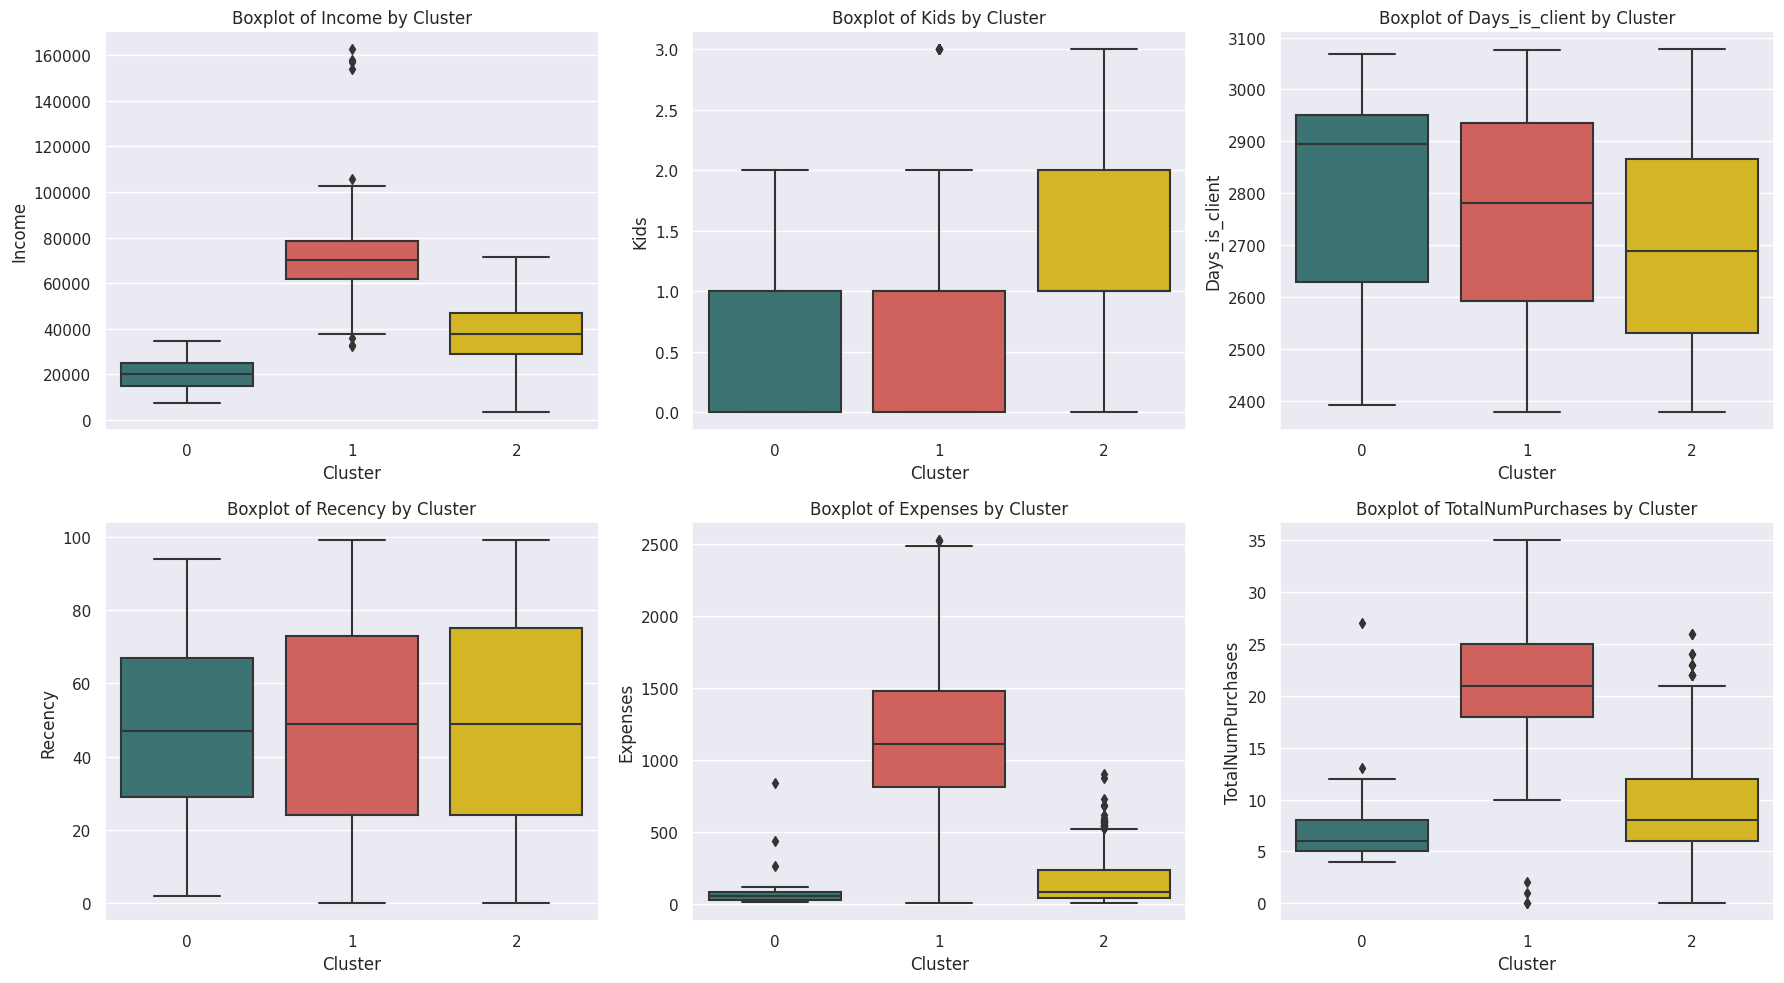

In [47]:
df_clusters = df.copy()
df_clusters['Cluster'] = y_kmeans

# Tạo lưới 2 hàng x 3 cột
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Tùy chỉnh kích thước theo ý muốn

# Các cột số muốn vẽ
columns_to_plot = ['Income', 'Kids', 'Days_is_client', 'Recency', 'Expenses', 'TotalNumPurchases']

# Flatten trục để dễ xử lý
axes = axes.flatten()

# Vẽ từng biểu đồ boxplot lên subplot
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x='Cluster', y=column, data=df_clusters, ax=axes[i], palette=custom_palette)
    axes[i].set_title(f'Boxplot of {column} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(column)

# Tự động căn chỉnh layout cho đẹp
plt.tight_layout()
plt.show()

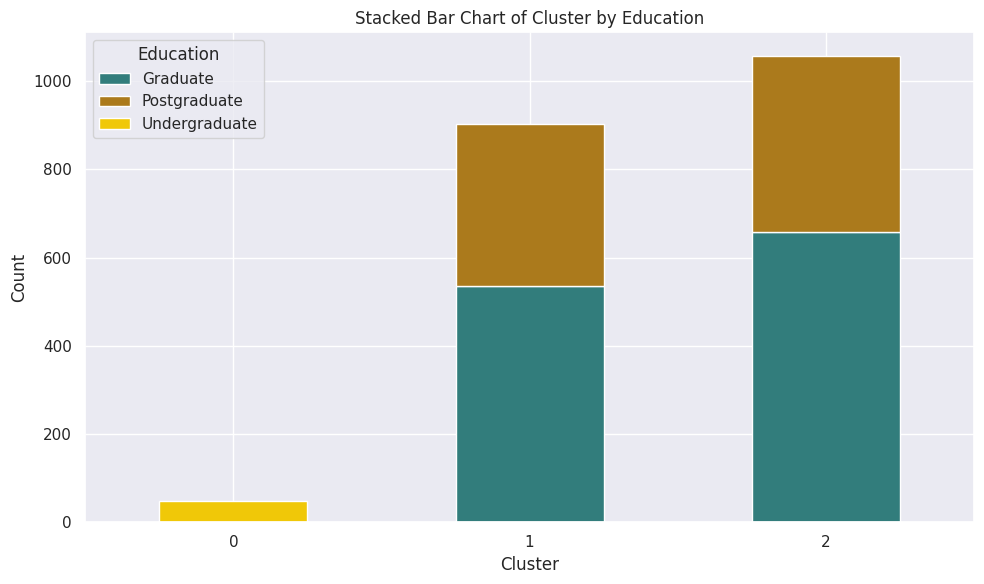

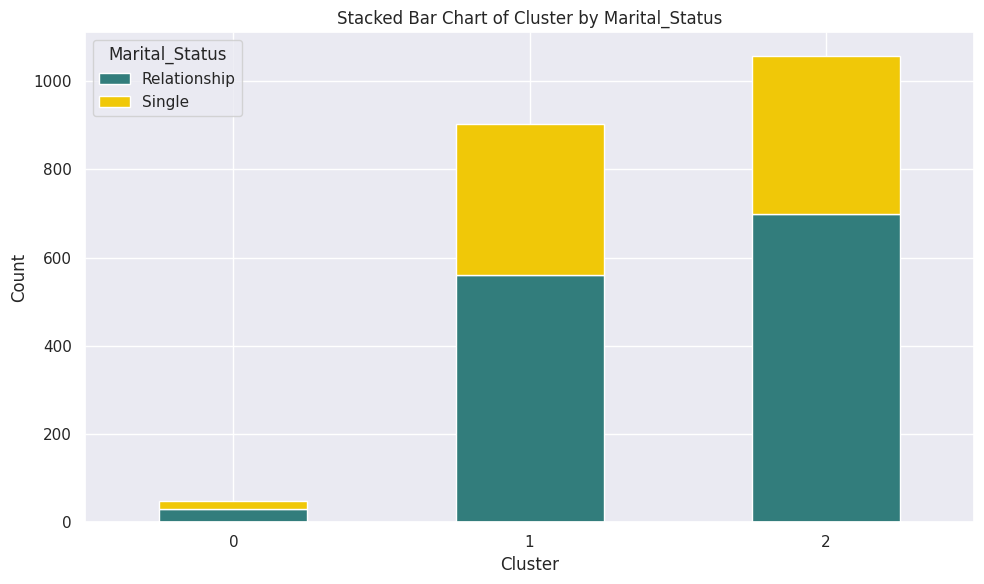

In [48]:
# Define the custom colormap
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_palette)

# List of categorical columns to plot
categorical_columns = ['Education', 'Marital_Status']

for column in categorical_columns:
    # Prepare data
    data = df_clusters.groupby(['Cluster', column]).size().unstack().fillna(0)
    
    # Plot stacked bar chart
    data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap=cmap)
    
    plt.title(f'Stacked Bar Chart of Cluster by {column}')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title=column)
    plt.xticks(rotation=0)
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()